In [2]:
import tensorflow as tf
print(tf.__version__)

2.3.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax
from tensorflow.keras.utils import plot_model

#### Build a feedforward neural network model

In [4]:
# Build the Sequential feedforward neural network model

input_shape = (28, 28)

model_1 = Sequential([
        Flatten(input_shape = input_shape),
        Dense(60, activation="relu"),
        Dense(10)
])

In [5]:
# Print the model summary

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 60)                47100     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                610       
Total params: 47,710
Trainable params: 47,710
Non-trainable params: 0
_________________________________________________________________


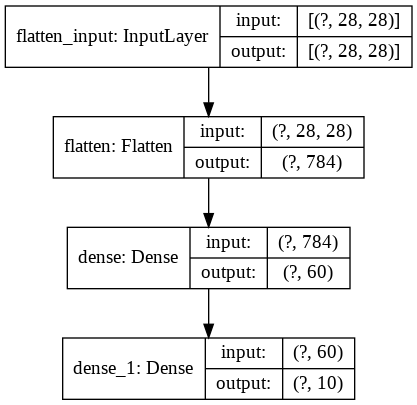

In [6]:
# Graphical Representaion

plot_model(model_1, to_file='feedforward_model.png', show_shapes=True, show_layer_names=True)

***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, InputLayer
from tensorflow.keras.utils import plot_model

#### Build a convolutional neural network model

In [8]:
# Build the Sequential convolutional neural network model

input_shape = (28, 28, 3)

model_2 = Sequential([
          InputLayer(input_shape=input_shape),
          Conv2D(filters = 16, kernel_size=(3, 3), activation="relu"),
          MaxPooling2D(pool_size=(2,2)),
          Flatten(),
          Dense(10, activation="linear")
])

In [9]:
# Print the model summary

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                27050     
Total params: 27,498
Trainable params: 27,498
Non-trainable params: 0
_________________________________________________________________


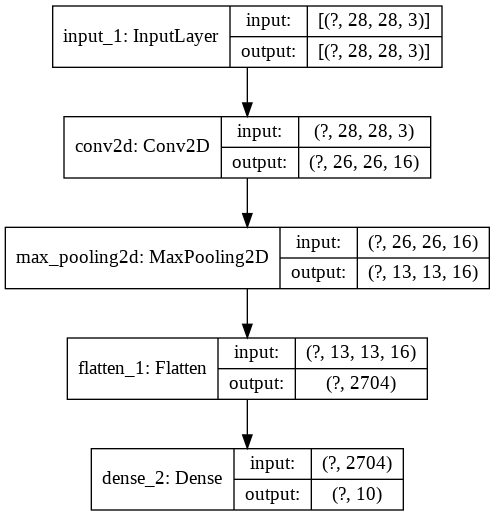

In [10]:
# Graphical Representation

plot_model(model_2, to_file="cnn_model.png", show_shapes=True, show_layer_names=True)

***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [11]:
from tensorflow.keras import losses
from tensorflow.keras import metrics

In [12]:
# Define the model optimizer, loss function and metrics

model_1.compile(  
                  optimizer = "adam", 
                  loss = losses.CategoricalCrossentropy, 
                  metrics = [metrics.CategoricalCrossentropy(), metrics.Accuracy()]
               )

In [13]:
# Print the resulting model attributes

print(model_1.optimizer)
print(model_1.loss)
print(model_1.metrics)

<class 'tensorflow.python.keras.losses.CategoricalCrossentropy'>
[]


***
<a id="coding_tutorial_4"></a>
## The fit method

In [14]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Reshape
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [15]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [16]:
# Print the shape of the training data

train_images.shape

(60000, 28, 28)

In [17]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [18]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images/255.0
test_images = test_images/255.0

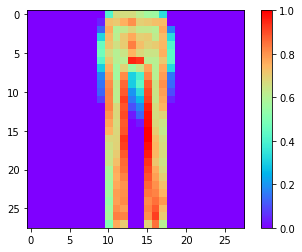

In [19]:
# Display one of the images

plt.figure()
plt.imshow(train_images[69], cmap="rainbow")
plt.colorbar()
plt.grid(False)
plt.show()

#### Fit the model

In [20]:
train_images[0].shape

(28, 28)

In [43]:
model = Sequential([
                    InputLayer(input_shape=(28,28, 1)),
                    Conv2D(filters=16, kernel_size=(3,3), activation="relu"),
                    MaxPooling2D(pool_size=(2,2)),
                    Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
                    MaxPooling2D(pool_size=(2,2)),
                    Conv2D(filters=128, kernel_size=(3,3), activation="relu"),
                    MaxPooling2D(pool_size=(2,2)),
                    Flatten(),
                    Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        9280      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 128)              

In [44]:
# Defining Parameters

model.compile(
    loss=losses.CategoricalCrossentropy(),
    optimizer="adam",
    metrics= [metrics.CategoricalAccuracy(), metrics.CosineSimilarity(), metrics.MeanAbsoluteError()]
)

In [45]:
# Fit the model

history = model.fit(
                      x = train_images[..., np.newaxis],
                      y = np.eye(10)[train_labels],
                      batch_size = 100,
                      epochs = 50,
                      verbose=2
)

Epoch 1/50
600/600 - 2s - loss: 0.6598 - categorical_accuracy: 0.7624 - cosine_similarity: 0.8011 - mean_absolute_error: 0.0678
Epoch 2/50
600/600 - 2s - loss: 0.4382 - categorical_accuracy: 0.8428 - cosine_similarity: 0.8689 - mean_absolute_error: 0.0465
Epoch 3/50
600/600 - 2s - loss: 0.3884 - categorical_accuracy: 0.8586 - cosine_similarity: 0.8831 - mean_absolute_error: 0.0413
Epoch 4/50
600/600 - 2s - loss: 0.3561 - categorical_accuracy: 0.8699 - cosine_similarity: 0.8925 - mean_absolute_error: 0.0381
Epoch 5/50
600/600 - 2s - loss: 0.3292 - categorical_accuracy: 0.8800 - cosine_similarity: 0.9008 - mean_absolute_error: 0.0353
Epoch 6/50
600/600 - 2s - loss: 0.3073 - categorical_accuracy: 0.8880 - cosine_similarity: 0.9072 - mean_absolute_error: 0.0331
Epoch 7/50
600/600 - 2s - loss: 0.2869 - categorical_accuracy: 0.8953 - cosine_similarity: 0.9133 - mean_absolute_error: 0.0311
Epoch 8/50
600/600 - 2s - loss: 0.2739 - categorical_accuracy: 0.8987 - cosine_similarity: 0.9171 - mean

#### Plot training history

In [46]:
# Load the history into a pandas Dataframe

train_df = pd.DataFrame(history.history)
train_df.head()

,loss,categorical_accuracy,cosine_similarity,mean_absolute_error
0,0.659803,0.762383,0.801076,0.067845
1,0.438181,0.842800,0.868888,0.046529
2,0.388448,0.858600,0.883077,0.041303
3,0.356122,0.869900,0.892541,0.038066
4,0.329229,0.880000,0.900758,0.035315


In [52]:
plt.rcParams["figure.figsize"] = 24, 6

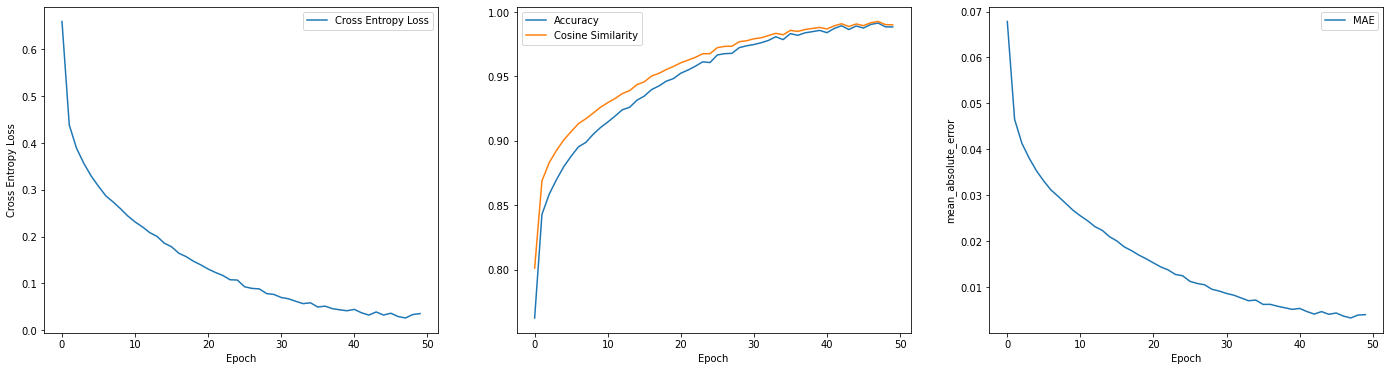

In [58]:
# Make a plot for the loss

plt.subplot(1, 3, 1)
plt.plot(train_df["loss"], label="Cross Entropy Loss")
plt.xlabel("Epoch")
plt.ylabel("Cross Entropy Loss")
plt.legend()


plt.subplot(1, 3, 2)
plt.plot(train_df["categorical_accuracy"], label="Accuracy")
plt.plot(train_df["cosine_similarity"], label="Cosine Similarity")
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(train_df["mean_absolute_error"], label="MAE")
plt.xlabel("Epoch")
plt.ylabel("mean_absolute_error")
plt.legend()

plt.show()

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [59]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [66]:
# Evaluate the model

loss, acc, cos, mae = model.evaluate(x = test_images[..., np.newaxis], 
                                     y = np.eye(10)[test_labels], 
                                     verbose=2)

print("\nCross EntropyLoss: {:0.6f}\nAccuracy: {:0.6f}\nCosine Similarity: {:0.6f}\nMean Absolute Error: {:0.6f}".format(loss, acc, cos, mae))

313/313 - 1s - loss: 0.6650 - categorical_accuracy: 0.8915 - cosine_similarity: 0.9011 - mean_absolute_error: 0.0225

Cross EntropyLoss: 0.664976
Accuracy: 0.891500
Cosine Similarity: 0.901141
Mean Absolute Error: 0.022513


#### Make predictions from the model

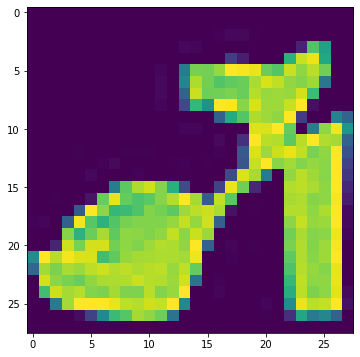

Label: Sandal
Predicted Label: Sandal


In [85]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
pred = np.argmax(model.predict(test_image[np.newaxis, ..., np.newaxis]))
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")
print(f"Predicted Label: {labels[pred]}")

In [90]:
# Get the model predictions

predicted_labels = np.argmax(
                            a = model.predict(x = test_images[..., np.newaxis]),
                            axis = 1
                            )

In [95]:
print("Testing Accuracy: {}%".format(100 * np.sum(predicted_labels == np.array(test_labels)) / len(test_labels)))

Testing Accuracy: 89.15%
